### Практикум по оптимизации № 1

### 1. Contour and Vector fields

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1.1 numpy meshgrid

In [6]:
x = np.array([1,5,10])
y = np.array([2,3,4])
X,Y = np.meshgrid(x,y)
X,Y

(array([[ 1,  5, 10],
        [ 1,  5, 10],
        [ 1,  5, 10]]), array([[2, 2, 2],
        [3, 3, 3],
        [4, 4, 4]]))

Make N-D coordinate arrays

In [23]:
x = np.array([1,2,3,4])
y = np.array([5,6])
X,Y = np.meshgrid(x,y)
X,Y

(array([[1, 2, 3, 4],
        [1, 2, 3, 4]]), array([[5, 5, 5, 5],
        [6, 6, 6, 6]]))

#### 1.2 Contours

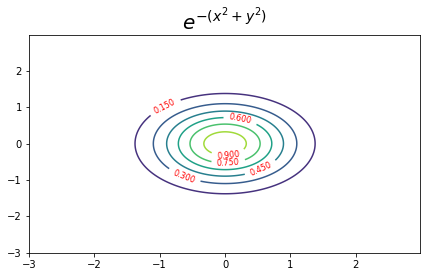

In [49]:
delta = 0.025
x = np.arange(-3,3,delta)
y = np.arange(-3,3,delta)
X,Y = np.meshgrid(x,y)
Z = np.exp(-(X**2 + Y**2))
fig, ax = plt.subplots(figsize=(7,4))
CS = ax.contour(X,Y,Z)
ax.clabel(CS,colors='red',fontsize = 8);
ax.set_title("$e^{-(x^{2} + y^{2})}$",fontsize=20);

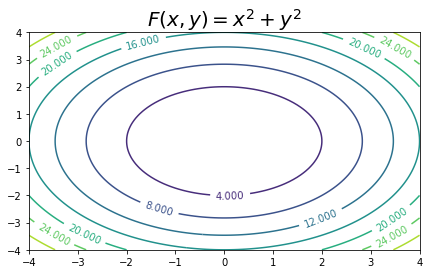

In [103]:
x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100)
x,y = np.meshgrid(x,y)
z = x**2 + y**2
fig,ax = plt.subplots(figsize =(7,4))
CS = ax.contour(x,y,z)
ax.clabel(CS,fontsize = 10)
ax.set_title("$F(x,y) = x^{2}+ y^{2}$",fontsize=20);

#### 1.3 Vector Fields

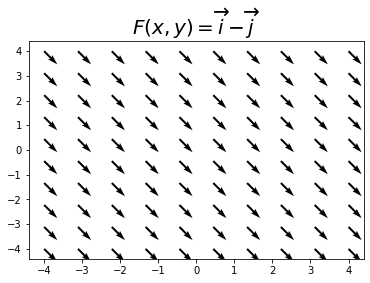

In [92]:
x = np.linspace(-4,4,10)
y = np.linspace(-4,4,10)
x,y = np.meshgrid(x,y)
u = 1
v = -1
plt.quiver(x,y,u,v)
plt.title("$F(x,y)=\overrightarrow{i} - \overrightarrow{j} $",fontsize=20)
plt.show()

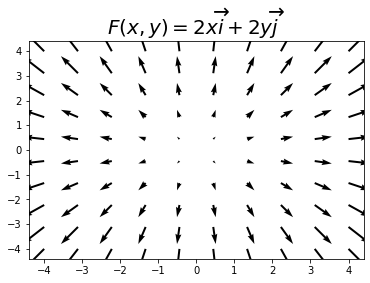

In [76]:
x = np.linspace(-4,4,10)
y = np.linspace(-4,4,10)
x,y = np.meshgrid(x,y)
u = 2*x
v = 2*y
plt.quiver(x,y,u,v)
plt.title("$F(x,y)= 2x\overrightarrow{i} + 2y\overrightarrow{j}$",fontsize=20)
plt.show()

#### 1.3  3D vector fields

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


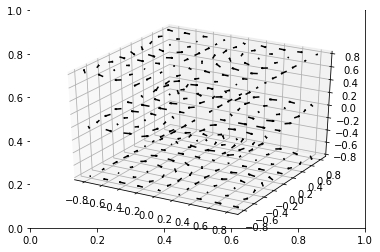

In [91]:
from mpl_toolkits.mplot3d import axes3d
fig,ax = plt.subplots()
ax = fig.gca(projection = '3d')
x,y,z = np.meshgrid(np.arange(-0.8,1,0.2),np.arange(-0.8,1,0.2),np.arange(-0.8,1,0.8))
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))
ax.quiver(x,y,z,u,v,w,length=0.1,color='black')
plt.show();

### 2. Minimizing multiple variable function

Let's look at the following multiple variable function 
$$F(x,y) = x^{2} + y^{2} + 1$$

Let's plot the graph

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  if __name__ == '__main__':


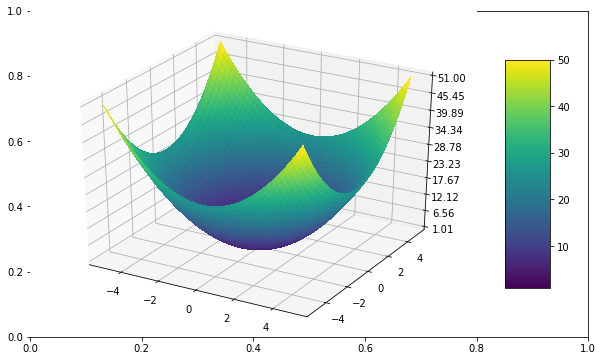

In [120]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
def f(x,y):
    return x**2 + y**2 + 1

x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)

X,Y = np.meshgrid(x,y)

Z = f(X,Y)

fig,ax = plt.subplots(figsize=(10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z,cmap= 'viridis',antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5);
plt.show();

Let's calculate following partial derivatives
$$\nabla{F_{x}} = 2x$$     $$\nabla{F_{y}} = 2y$$

Therefore, the derivative looks like following
$$\nabla{F}= 2x\overrightarrow{i} + 2y\overrightarrow{j}$$

Let's plot the vector field of this derivative

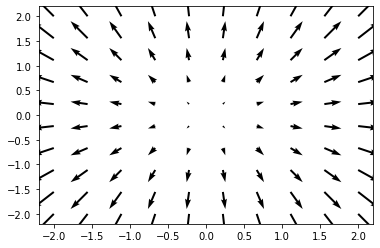

In [124]:
x = np.linspace(-2,2,10)
y = np.linspace(-2,2,10)
X,Y = np.meshgrid(x,y)
u = 2*X
v = 2*Y
plt.quiver(X,Y,u,v)
plt.show()

(0,0) is sure to be global minimum of $\textbf{f(x,y)}$, since $\textbf{f(0,0)=1}$ and $\textbf{f(x,y)>=1}$

Let's plot the contour of this function 

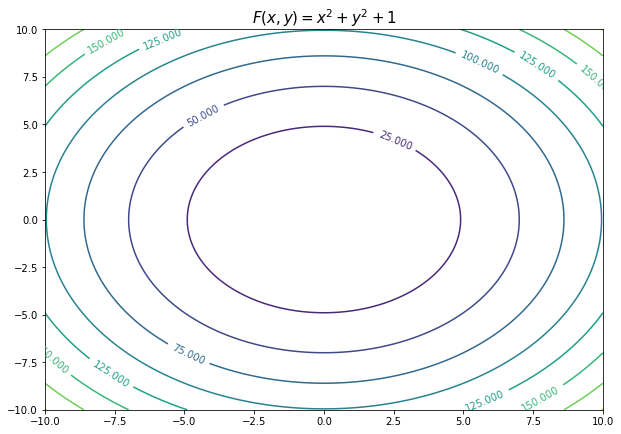

In [129]:
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)
Z = X**2 + Y**2 + 1
fig,ax = plt.subplots(figsize=(10,7))
CS = ax.contour(X,Y,Z,cmap = 'viridis')
ax.clabel(CS,fontsize=10)
ax.set_title("$F(x,y) = x^{2} + y^{2} + 1$",fontsize=15)
plt.show();

We are to find the global minimum of this function and the Gradient Descent enables our problem to be solved.

As we have already said, the Gradient Descent is defined as follow:
$$x^{k+1} = x^{k} - h\nabla{F(x^{k})}$$

Since we have 2 dimentional variable function, therefore
$$\begin{pmatrix}
x^{k+1}\\
y^{k+1}
\end{pmatrix}
= 
\begin{pmatrix}
x^{k}\\
y^{k}
\end{pmatrix}
-
\lambda
\begin{pmatrix}
\nabla{F(x_{k})}\\
\nabla{F(y_{k})}
\end{pmatrix}
$$
K - gradient descent iteration

In [130]:
def dfdx(x,y):
    return 2*x
def dfdy(x,y):
    return 2*y
def derivative(x,y):
    return np.array([dfdx(x,y),dfdy(x,y)])

In [131]:
def gradient_descent(derivative, learning_rate, x_prev, epsilon=0.001):
    
    #number of iterations
    grad_itter = 1
    
    #itteratio's list of x,y coordinates
    seq_x = []
    seq_y = []
    
    #first iteration of gradient descent
    x_next = np.subtract(x_prev,learning_rate*derivative(x_prev[0],x_prev[1]))
    
    seq_x = np.append(seq_x,x_prev[0])
    seq_y = np.append(seq_y,x_prev[1])
    
    # Itterate until abs(x_{k+1} - x_{k}) < epsilon i.e. the convergence of coordinates
    # abs(x_{k+1} - x_{k}) is defined as euclidean distance 
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        x_prev = x_next
        x_next = np.subtract(x_prev,learning_rate*derivative(x_prev[0],x_prev[1]))
        
        grad_itter+=1
        seq_x = np.append(seq_x,x_next[0])
        seq_y = np.append(seq_y,x_next[1])
        
    return(x_next,grad_itter,seq_x,seq_y,)

To  summarise, we have the smooth problem, therefore according to the theory, we should pick the learning rate out as follow:
$$h = \frac{1}{L}$$
Since, there are smooth problem:
$$\left\Vert{\nabla{f(x)} - \nabla{f(y)}}\right\Vert \leq L\left\Vert{x-y}\right\Vert $$

In [141]:
gradient = gradient_descent(derivative,0.2,np.array([6,2]))
# Print gradient descent solution
print('Minimum (x,y) from gradient descent: %s' %gradient[0])
print('Number of gradient descent itterations: %s' %gradient[1])

Minimum (x,y) from gradient descent: [0.0010156  0.00033853]
Number of gradient descent itterations: 17


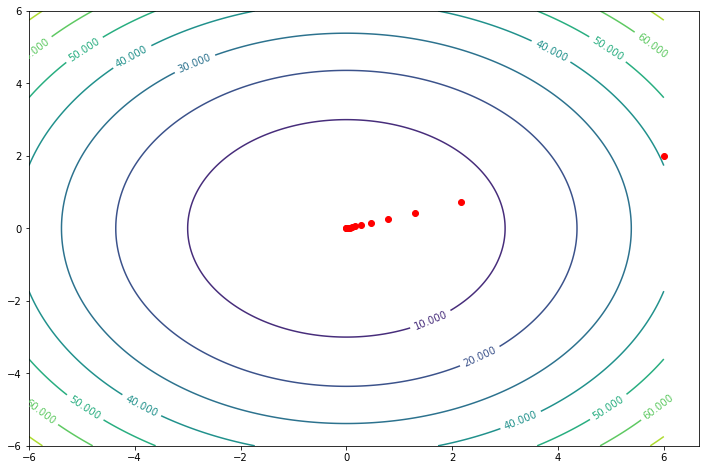

In [145]:
x,y = np.linspace(-6,6,1000),np.linspace(-6,6,1000)
X,Y = np.meshgrid(x,y)
Z = X**2 + Y**2 + 1
fig,ax = plt.subplots(figsize=(12,8))
CS = ax.contour(X,Y,Z,cmap='viridis')
ax.clabel(CS,fontsize=10)
ax.scatter(gradient[2],gradient[3],color='r');